# 02. Списки и деревья

<div style="text-align: right"> 
    
    Лекция 1.2 04/02/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

## 02.1 Списки в языке Haskell

Используются именно списки, а не массивы, поэтому операция индексации происходит гораздо более медленнее, чем в массивах (`O(n)` вместо `O(1)`).

- `[]` - пустой список, пустая ссылка в других языках программирования
- списки являются однородной структурой, элементы должны быть одного и того же типа

In [1]:
[1, 2, 3]

[1,2,3]

- `1:[2,3]` - конструктор - присоединение головного элемента к списку.

**Конструктор** не делает никаких преобразований над значениями - получившуюся конструкцию всегда можно разобрать - мы всегда сможем присоединить и , что более важно, отсоъединить голову.

**Функции** - выдают совершенно новый объект, который нельзя разделить машинным образом.

In [2]:
1:[2,3]

[1,2,3]

`1:(2:(3:[]))`  -- создание списка с помощью конструктора ':' и пустого списка. В некотором смысле константы являются *костнукторами* - **конструкторами констант**

In [3]:
1:(2:(3:[]))

Line 1: Use list literal
Found:
1 : (2 : (3 : []))
Why not:
[1, 2, 3]

[1,2,3]

- `[1..n]` - создание списка с помощью арифметической прогрессии, шаг единица

- `[2, 4..20]` - арифметическая прогрессия с заданной разностью, которая задаётся **2**-мя первыми элементами

Кортежи содержат определенное количество элементов, в списке мы не знаем количества элементов заранее.

**Типы списков**

- `[Integer]` - список и целых чисел: `[1..10]`
- `[Char]` - список из символов (строка: `"List" == ['L','i','s','t']`)
- `[(Char, Int)]` - список из кортежей: `[('L', 1), ('i', 2), ('s', 3)]`
- `[[Int]]`      -- список из списков: `[[1, 2], [3, 5..10], []]`

**Функция суммирования элементов списка**

Сами можем описывать функции обработки списков. В качестве образцов будем использовать **конструкторы**.

In [4]:
sumList       ::  [Integer] -> Integer
sumList []    =   0 -- если пустой список, то 0
sumList (x:s) =   x + sumList s -- если результат составлен с помощью конструктора
-- голова:хвост (кроме пустого), то выделяем голову и хвост

Line 2: Use foldr
Found:
sumList [] = 0
sumList (x : s) = x + sumList s
Why not:
sumList s = foldr (+) 0 s

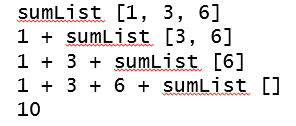

Так производится сопоставление образцов.

In [5]:
sumList [1..100]

5050

**Кортеж** - тоже конструктор.

In [6]:
factorial          ::  Integer -> Integer
prodList'          ::  [Integer] -> Integer -> Integer
factorial n         =  prodList' [1..n] 1
prodList' [] p      =  p
prodList' (x:ls) p  =  prodList' ls (p*x)     -- концевая рекурсия

Line 4: Use foldl
Found:
prodList' [] p = p
prodList' (x : ls) p = prodList' ls (p * x)
Why not:
prodList' ls p = foldl (*) p ls

**Несколько стандартных операций над списком и их определения.**

- голова списка

In [7]:
head          :: [a] -> a -- на вход список, на выходе - число
head (x:ls)   =  x -- выдаем голову
head []       =  error "head: empty list"

- хвост списка (всё без головы)

In [8]:
tail          :: [a] -> [a] -- хвост списка
tail (x:ls)   =  ls
tail []       =  error "tail: empty list"

- длина списка

In [9]:
length        :: [a] -> Int -- количество элементов
length (x:ls) =  1 + length ls
length []     =  0

Line 2: Use foldr
Found:
length (x : ls) = 1 + length ls
length [] = 0
Why not:
length ls = foldr (\ x -> (+) 1) 0 ls

Время работы пропорционально длине списка.

- пустой или нет список

In [10]:
null          :: [a] -> Bool -- пустой список или нет
null (x:ls)   =  False
null []       =  True

- последний элемент списка

In [11]:
last          :: [a] -> a --последний элемент списка
last []       =  error "last: empty list"
last [x]      =  x -- если список из одного элемента, то возвращаем последний
last (x:ls)   =  last ls -- рекурсивный вызов

In [12]:
last [4, 7, 10, 3]

3

- без последнего элемента

In [13]:
init          :: [a] -> [a] -- удалить последний
init []       =  error "init: empty list"
init [x]      =  []
init (x:ls)   =  x : init ls

In [14]:
init [1..10]

[1,2,3,4,5,6,7,8,9]

- индексация списка

In [15]:
(!!)          :: [a] -> Int -> a -- индексация, a - переменная типа
[] !! _       =  error "(!!): empty list"
(x:ls) !! 0   =  x
(x:ls) !! n   =  ls !! (n-1)

In [16]:
[1,2,3] !! 1

2


- список индексируется коротким целым `Int`!!
- нумерация начинается с нуля
- если больше длины списка, то ошибка
- в обозначение типа используется Переменные типа

- конкатенация

в качестве первого операнда берем более короткий, второй операнд становится неизменным

In [17]:
(++)          :: [a] -> [a] -> [a] --соединение списка
[] ++ ls      =  ls
(x:l1) ++ l2  =  x : (l1 ++ l2)

In [18]:
[1,2,3] ++ [4,10]

[1,2,3,4,10]

In [19]:
[4, 10] ++ [1, 2, 3]

[4,10,1,2,3]

- разворот списка

In [20]:
reverse       :: [a] -> [a] --развернуть список
reverse'      :: [a] -> [a] -> [a] 
reverse ls         = reverse' ls []
reverse' [] l      = l
reverse' (x:ls) l  = reverse' ls (x:l)

Line 4: Use foldl
Found:
reverse' [] l = l
reverse' (x : ls) l = reverse' ls (x : l)
Why not:
reverse' ls l = foldl (flip (:)) l ls

In [21]:
reverse [1..10]

[10,9,8,7,6,5,4,3,2,1]

Списки в Haskell - аналогия `LinkedList`. Все значения представлены указателями.

- суммирование

- `Num a=> [a] -> a` - сторож, тип a принадлежит классу Num, если операция разрешена, то можно складывать

In [22]:
sum         :: Num a => [a] -> a 
sum []       =  0
sum (x:t)    =  x + sum t

Line 2: Use foldr
Found:
sum [] = 0
sum (x : t) = x + sum t
Why not:
sum t = foldr (+) 0 t

In [23]:
sum [1, 2, 3]

6

- взять `n` элементов списка

In [24]:
take              :: Int -> [a] -> [a]
take _ []          =  [] -- первый аргумент - количество
take n _ | n <= 0  =  [] -- если n < 0
take n (x:t)       =  x : take (n-1) t

In [25]:
take (-1) [1,2,3]

Line 1: Take on a non-positive
Found:
take (- 1) [1, 2, 3]
Why not:
[]

[]

есть еще функция `drop` - отбрасывает первые $n$ элементов. 

- `_` - анонимная функция

- взять максимум списка

Максимального элемента у пустого списка не существует. Используется функция - `max(a, b)` - максимум из двух.

In [26]:
maximum        :: Ord a => [a] -> a
maximum []      =  error "maximum: empty list"
maximum [x]     =  x
maximum (x:t)   =  max x (maximum t)

- соединение в пары `zip`, часто используется. работает за время, пропорциональное длине списка

In [27]:
zip                  :: [a] -> [b] -> [(a, b)]
zip [] _             =  []
zip _ []             =  []
zip (e1:t1) (e2:t2)  =  (e1, e2) : zip t1 t2

In [28]:
zip [1, 2, 3] ['a', 'b', 'z']

[(1,'a'),(2,'b'),(3,'z')]

In [29]:
zip [1, 2, 3] ['a', 'b']

[(1,'a'),(2,'b')]

- список из пар

Используется конструкция `where`, локально сопоставимая с образцом.

- `fst`, `scnd` - first и second
- `where` можно поставить для нескольких уравнений, как идля одного

In [30]:
unzip             :: [(a,b)] -> ([a],[b]) 
unzip []           = ([], [])
unzip ((e1,e2):t)  = (e1:tail1, e2:tail2) where (tail1,tail2) = unzip t

In [31]:
cor = unzip (zip [1, 2, 3] ['a', 'b', 'c', 'd'])
cor

([1,2,3],"abc")

In [32]:
:t cor

cor :: forall a. Num a => ([a], [Char])

Существует еще очень много операций со списками в модуле `Data.List`

In [34]:
import Data.List

## 02.2 Определение новых типов данных

Во-первых, для любого типа можно создать синоним, Обозначив идетификатором уже существующий тип - будет *сокращением для более сложного типа*.

- `type String   = [Char]`
- `type Coord    = (Double, Double)` - пара двух вещественнных чисел
- `type Pair a   = (a, a)` - могут быть **параметризованы** - задаём параметр типа использовать в правой части, где фактический параметр $a$
- `type Complex  = Pair Double`

### 02.2.1 Использование синонимов

- функция, ищущая символ в строке и выдаёт индекс

In [54]:
type String  = [Char]
find       :: String -> Char -> Int
find [] _                  =  -1 -- если ищу в пустой строке, можно и ''
find (x:s) y | x == y      =  0
             | otherwise   =  1 + find s y

In [53]:
find "strtrtr" "t"

: 

In [41]:
type Coord    = (Double, Double)
distance   :: Coord -> Coord -> Double
distance (x1, y1) (x2, y2) = sqrt ((x2-x1) * (x2-x1) + (y2-y1) * (y2-y1))

In [42]:
distance (4, 5) (4, 6)

1.0

Заметим, что плохо, что синонимы задают *один и тот же тип*, но хотелось бы иметь типы, отличающиеся от других (между прочим).

In [45]:
type Complex  = Pair Double
type Pair a   = (a, a)
complexAdd :: Complex -> Complex -> Complex
complexAdd (r1, i1) (r2, i2)  =  (r1+r2, i1+i2)

In [46]:
swap       :: Pair a -> Pair a
swap (x, y)  =  (y, x)

In [47]:
swap (4, 5)

(5,4)

### 02.2.3 Опреледение конструкторов

Новая конструкция, в которых мы можем задавать конструкторы новых типов данных. У нас уже были конструкторы списков - `[]` и `:`. Можем создавать свои.

In [48]:
data WeekDay = Sun | Mon | Tue | Wed | Thu | Fri | Sat
data Bool    = False | True

- через вертикальную черту определяю конструктор
- определяем идентификатор `WeekDay` со значениями дней недели...
- для целого числа `Int` в качестве конструкторов - огромное количество целых чисел.... - в качестве образца может быть рассмотрен любой конструктор

**Использование конструкторов**

- определяем выходной день `WeekDay` - именно тип `WeekDay`, нами созданное. Поэтому этот тип является новым и его значения - только те, что определены конструктором
- без параметров называется перечислением `Enum`

In [55]:
weekend       :: WeekDay -> Bool
weekend Sun   =  True
weekend Sat   =  True
weekend _     =  False

**Конструкторы с параметром**

- значение сформированного конструкторов - набор некоторых значений + некоторый тег - значение x, y и **тэг** Couple

- *тэги конструкторов* - представлены возрастающей последовательностью чисел

In [59]:
data Coord   =  Point Double Double -- конструктор Point с двумя вещественными
data Pair a  =  Couple a a

- значение `Point Double Double` будет иметь значение `Coord`

**Использование конструкторов с параметрами**

In [60]:
distance   :: Coord -> Coord -> Double
distance (Point x1 y1) (Point x2 y2)  = 
                             sqrt ((x2-x1) * (x2-x1) + (y2-y1) * (y2-y1))

In [62]:
swap       :: Pair a -> Pair a
swap (Couple x y)    =  Couple y x

### 02.2.4 Сложные типы данных

Определим заново список из целых чисел.

In [63]:
data IntList = Nil | Cons Integer IntList 
-- Nil
-- Cons Integer IntList - рекурсивное определение типа данных
-- в качестве второго аргумента служит список - хвост, указатель на следующий элемент

In [64]:
sumList             ::  IntList -> Integer
sumList Nil           =  0
sumList (Cons e ls)     =  e + sumList ls

In [82]:
let a = [1, 2, 3] :: IntList

: 

- можно еще делать *инфиксные операции* `:+:` - она начинается с двоеточия и заканчивается им

In [68]:
data List a = Nil | a :+: (List a)

In [71]:
sumList             ::  List Integer -> Integer
sumList Nil           =  0
sumList (e :+: ls)     =  e + sumList ls

In [76]:
sumList             :: (Num a) => List a -> a -- если любым числам
sumList Nil           =  0
sumList (e :+: ls)     =  e + sumList ls

In [78]:
data [a] = [] | a : [a] --конструктор пустого списка, голова и хвост

: 

*Сортировка списка* - сортировка вставками

In [80]:
insert          :: (Ord a) => a -> [a] -> [a]
insert elem []  = [elem]
insert elem list@(x:s) | elem < x   = elem:list
                       | otherwise  = x:(insert elem s)

Line 4: Redundant bracket
Found:
x : (insert elem s)
Why not:
x : insert elem s

In [81]:
insSort          :: (Ord a) => [a] -> [a]
insSort []       = []
insSort (x:s)    = insert x (insSort s)

Line 2: Use foldr
Found:
insSort [] = []
insSort (x : s) = insert x (insSort s)
Why not:
insSort s = foldr insert [] s

- каждый раз мы создаём новый объект при сортировке списка. При сортировке массива мы в памяти меняем индексы. Новые объекты создаются с помощью конструкторов. В процессе этого алгоритма создаются $\frac{n^2}{2}$ новых объектов - будет столько памяти использоваться.

## 02.3 Определени и обработка двоичного дерева

Каждый из узлов может иметь ссылку на левое и правое поддерево.
- нужно определить конструктор пустого дерева
- конструктор непустого

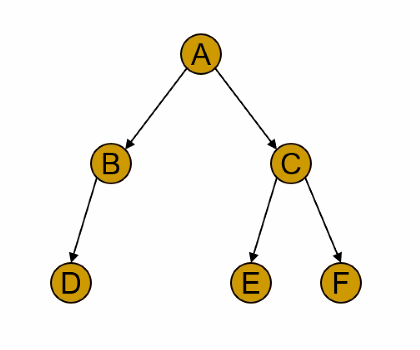

In [83]:
data Tree a = Empty |
              Node (Tree a) a (Tree a)

In [84]:
myTree  ::  Tree Char
myTree  = Node (Node 
                  (Node Empty 'D' Empty)
                  'B'
                  Empty)
               'A'
               (Node
                  (Node Empty 'E' Empty)
                  'C'
                  (Node Empty 'F' Empty))

- определим высоту дерева

In [87]:
height  ::  Tree a -> Int
height Empty           =  0 -- если конструктором Empty, то 0
height (Node t1 _ t2)  =  1 + max (height t1) (height t2) -- если другим, то это

In [88]:
height myTree

3

### 02.3.1. Сортировка с помощью двоичного дерева

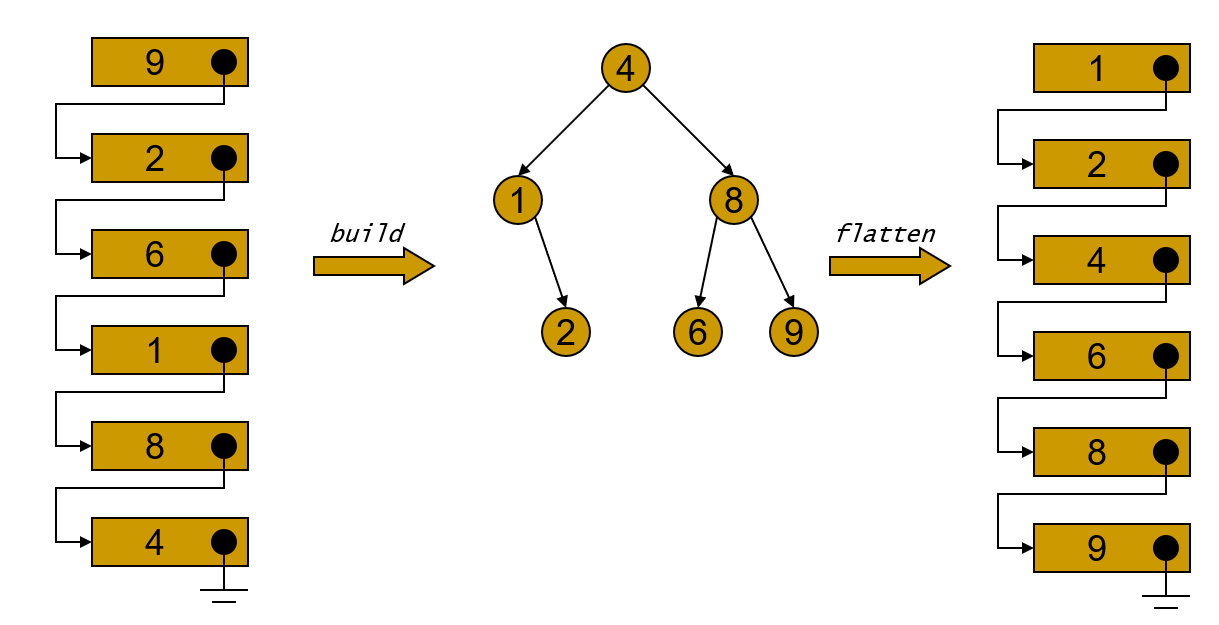

Начнём с последнего элемента списка - берём последний элемент списка, 8 - в правое поддерево, так как больше и.т.д...

In [ ]:
sort    :: (Ord a) => [a] -> [a] -- Сортировка
build   :: (Ord a) => [a] -> Tree a -- построение двоичного дерева
-- только если можно сравнивать
flatten :: Tree a -> [a] -- превращает дерево в плоский список

sort ls  =  flatten (build ls) -- суперпозиция двух функций

**Программа сортировки с помощью двоичного дерева**

In [92]:
data Tree a = Empty |
              Node (Tree a) a (Tree a)
              
sort    :: (Ord a) => [a] -> [a]
build   :: (Ord a) => [a] -> Tree a
insert  :: (Ord a) => a -> Tree a -> Tree a --вставление элемента в дерево
flatten :: Tree a -> [a]

-- сортировка
sort ls       =  flatten (build ls)

-- построение с хвоста списка дерева
build []      =  Empty
build (e:ls)  =  insert e (build ls) -- дерево строится с хвоста

-- вставка элемента в дерево
insert e Empty                    =  Node Empty e Empty
insert e (Node t1 n t2) | e < n   =  Node (insert e t1) n t2
                        | e >= n  =  Node t1 n (insert e t2)

-- получение отсортированного списка
flatten Empty = []
flatten (Node t1 n t2) = (flatten t1) ++ (n : (flatten t2))
-- соединение списков ++
-- ++ - разбирает левый список на части, по одному разбирает элементы

Line 13: Use foldr
Found:
build [] = Empty
build (e : ls) = insert e (build ls)
Why not:
build ls = foldr insert Empty lsLine 23: Redundant bracket
Found:
(flatten t1) ++ (n : (flatten t2))
Why not:
flatten t1 ++ (n : (flatten t2))Line 23: Redundant bracket
Found:
n : (flatten t2)
Why not:
n : flatten t2

In [93]:
sort [1,5,4,3,8,6,2,3]

[1,2,3,3,4,5,6,8]

### 02.3.2. Программа сортировки с помощью двоичного дерева

In [94]:
merge :: Ord a => [a] -> [a] -> [a]
merge [] s2 = s2
merge s1 [] = s1
merge s1@(x1:t1) s2@(x2:t2) = if x1 < x2 then x1 : merge t1 s2
                                         else x2 : merge s1 t2
                                    
mergeSort :: Ord a => [a] -> [a]
mergeSort [] = []
mergeSort s@[x] = s
mergeSort s = merge (mergeSort s1) (mergeSort s2)
        where (s1,s2) = splitAt (length s `div` 2) s

- `splitAt` - разбивает список по данному индексу
- `s@[x]` - обозначаю буквой `s` список `[x]`

### 02.3.3 Еще один способ объявления нового типа данных

Иногда хочется объявить синоним для типа данных, но так, чтобы это был всё же отличающийся от исходного тип.

```haskell
data Vector a = Vector (a, a)
```

Однако, представление объектов типа Pair «нагружено» тегом “Pair”. Чтобы сохранить внутреннее представление в виде обычного кортежа, а внешнее представление сделать отличающимся от базового типа, можно написать

```haskell
newtype Vector a = Vector (a, a)
```

Одновременно вместе с описанием типа можно указать и «функцию доступа» (getter)

```haskell
newtype Vector a = Vector { getCoords :: (a, a) }
```

Функция сложения векторов с числовыми координатами:

```haskell
vectorAdd :: Num a => Vector a -> Vector a -> Vector a
vectorAdd (Vector (x1, y1)) (Vector (x2, y2)) = Vector (x1+x2, y1+y2)
```